In [1]:
import json
import os

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:

font_path = "/users/atwang/fonts/Inter/Inter Variable/Inter.ttf"
prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

sns.set(font=prop.get_name())

In [3]:
recall_proj_dir = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562/v10_proj_a_0.6_c_0.0005/modisco_recall/modisco_recall_data"
recall_hyp_dir = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562/v10_hyp_a_0.6_c_0.0005/modisco_recall/modisco_recall_data"

seqlet_counts_path = "/oak/stanford/groups/akundaje/atwang/finemo_gpu_test/K562/v10_proj_a_0.6_c_0.0005/modisco_recall/modisco_recall_data/seqlet_counts.json"

In [4]:
with open(seqlet_counts_path) as f:
    seqlet_counts = json.load(f)

In [5]:
def load_data(recall_proj_dir, recall_hyp_dir, motif_name):
    recall_proj_path = os.path.join(recall_proj_dir, f"{motif_name}.txt.gz")
    recall_hyp_path = os.path.join(recall_hyp_dir, f"{motif_name}.txt.gz")

    recall_proj = np.loadtxt(recall_proj_path)
    recall_hyp = np.loadtxt(recall_hyp_path)

    return recall_proj, recall_hyp

In [6]:
def plot_recall(recall_proj, recall_hyp, num_seqlets):    
    num_hits_proj = recall_proj.shape[0]
    num_hits_hyp = recall_hyp.shape[0]
    num_hits_bound = max(num_hits_proj, num_hits_hyp)
    x_proj = np.arange(num_hits_proj)
    x_hyp = np.arange(num_hits_hyp)
    x_bound = np.arange(num_hits_bound)

    bound = np.full(num_hits_bound, num_seqlets)
    ramp_max = min(num_seqlets, num_hits_bound)
    bound[:ramp_max] = np.arange(1, ramp_max + 1)
    bound = bound.astype(float) / float(num_seqlets)
    
    plt.plot(x_proj, recall_proj, label="Coefficients (Projected)")
    plt.plot(x_hyp, recall_hyp, label="Coefficients (Hypothetical)")
    plt.plot(x_bound, bound, label="Upper limit")
    plt.xlabel("Hit rank")
    plt.ylabel("Recall")

    plt.legend()
    
    plt.show()

    plt.close()

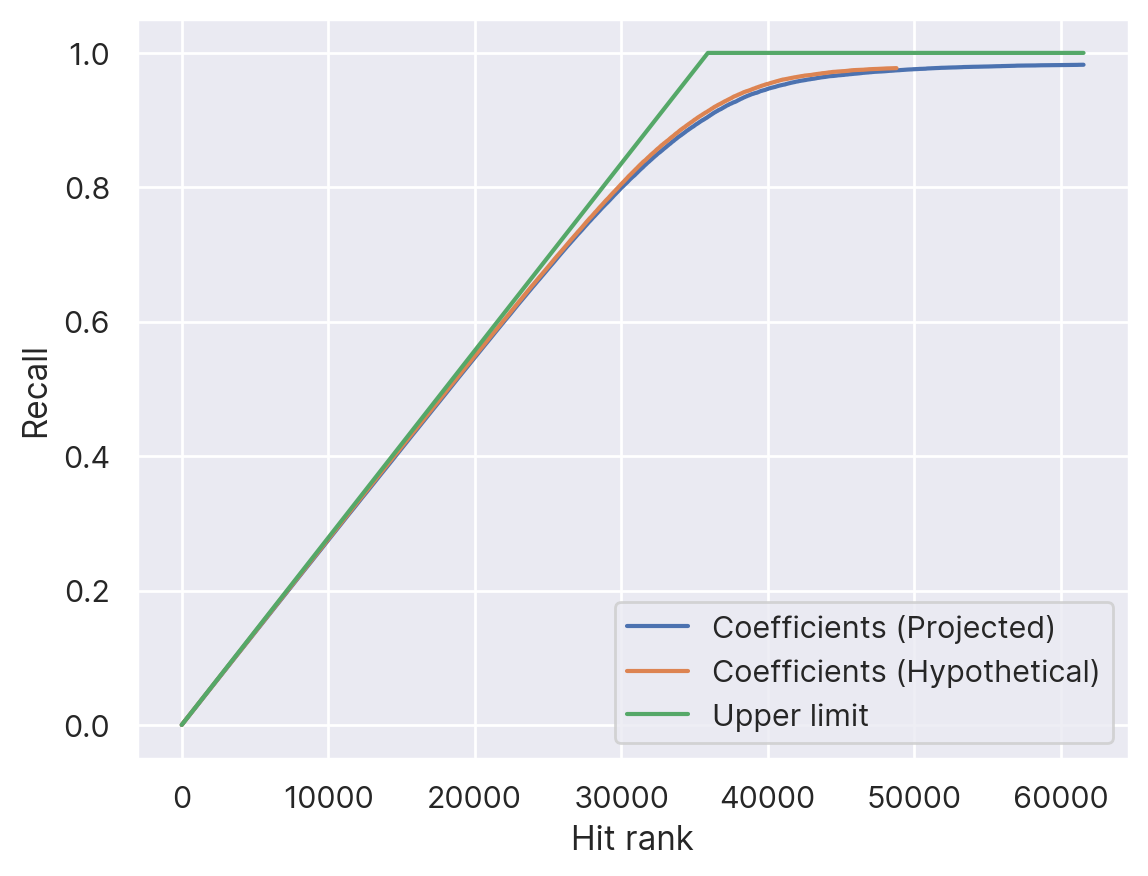

In [7]:
# CTCF
motif_name = "pos_patterns.pattern_1"

recall_proj, recall_hyp = load_data(recall_proj_dir, recall_hyp_dir, motif_name)
plot_recall(recall_proj, recall_hyp, seqlet_counts[motif_name])

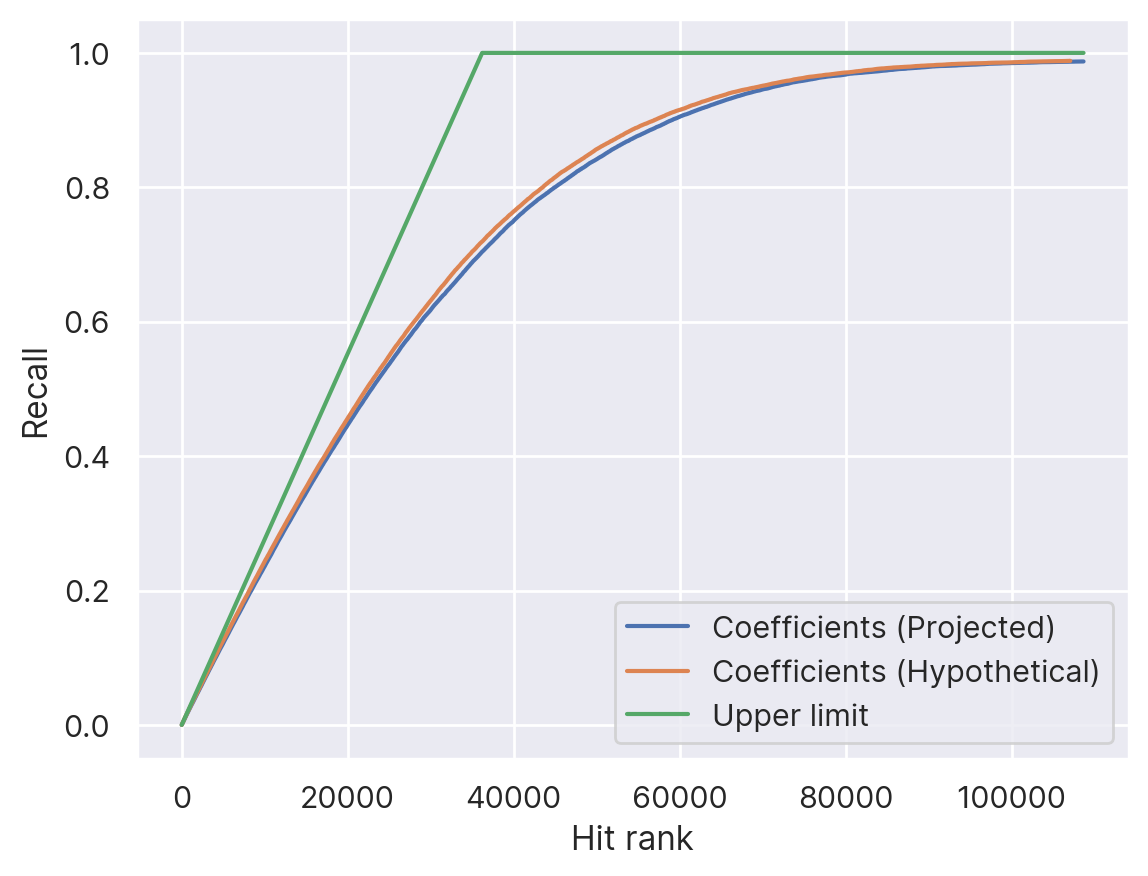

In [8]:
# GATA
motif_name = "pos_patterns.pattern_0"

recall_proj, recall_hyp = load_data(recall_proj_dir, recall_hyp_dir, motif_name)
plot_recall(recall_proj, recall_hyp, seqlet_counts[motif_name])

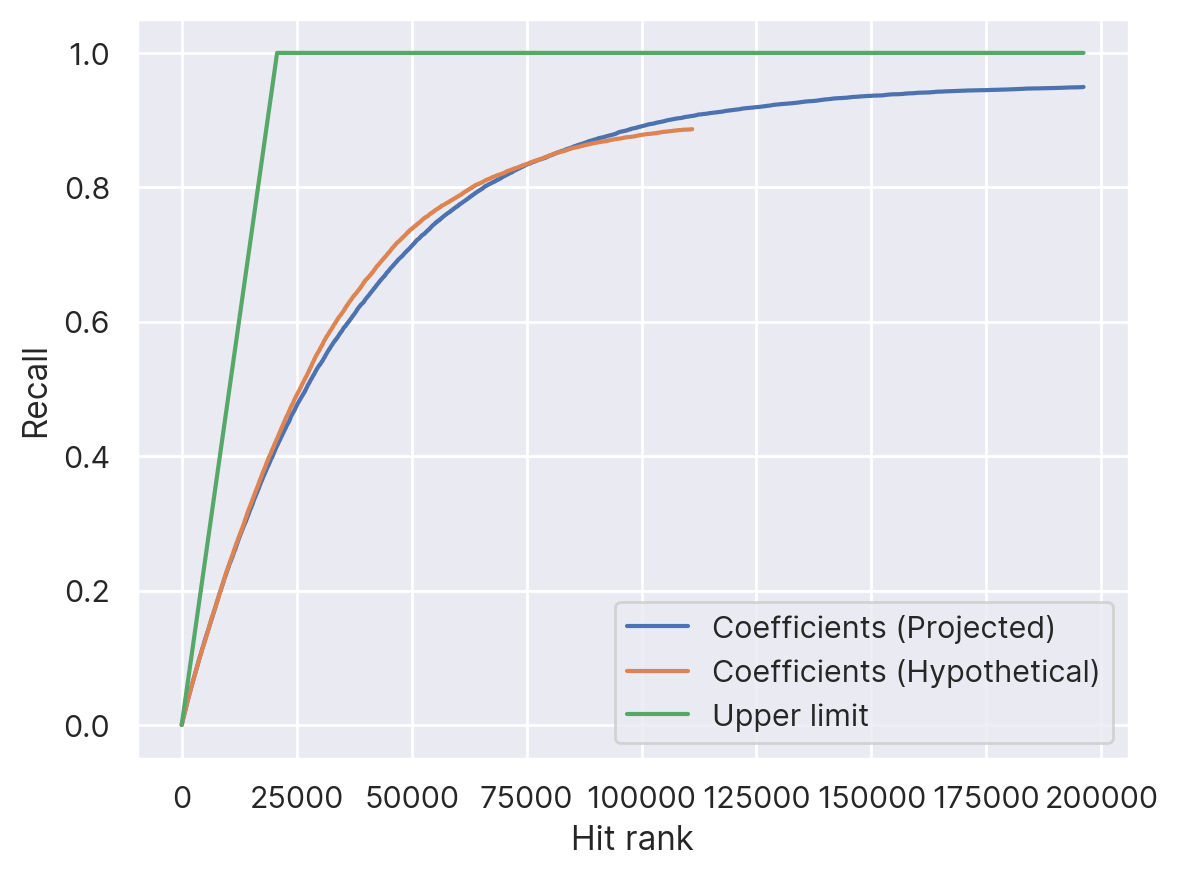

In [9]:
# SP1
motif_name = "pos_patterns.pattern_2"

recall_proj, recall_hyp = load_data(recall_proj_dir, recall_hyp_dir, motif_name)
plot_recall(recall_proj, recall_hyp, seqlet_counts[motif_name])

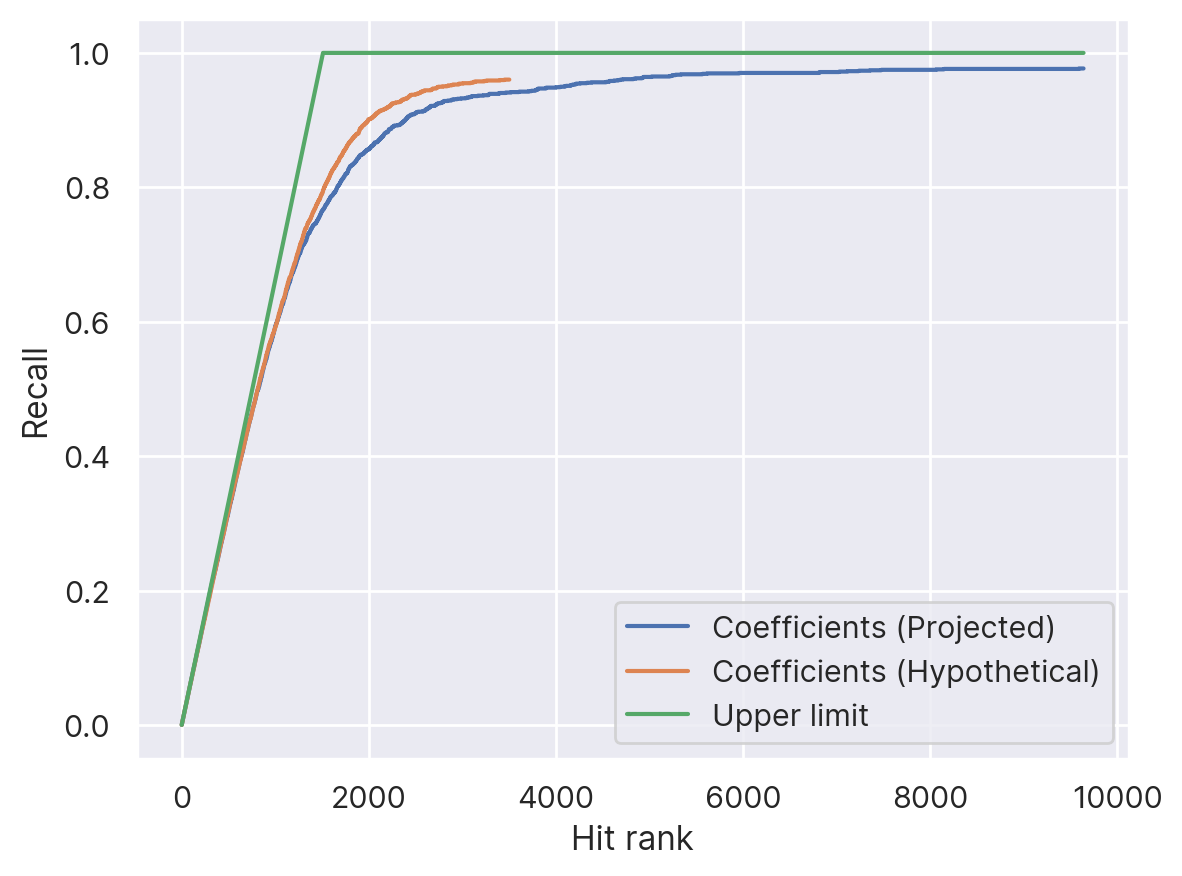

In [10]:
# YY1
motif_name = "pos_patterns.pattern_13"

recall_proj, recall_hyp = load_data(recall_proj_dir, recall_hyp_dir, motif_name)
plot_recall(recall_proj, recall_hyp, seqlet_counts[motif_name])